11490434/11490434 [==============================] - 312s 27us/step
Epoch 1/5
1688/1688 [==============================] - 14s 7ms/step - loss: 0.2820 - accuracy: 0.9193 - val_loss: 0.1343 - val_accuracy: 0.9612
Epoch 2/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1254 - accuracy: 0.9632 - val_loss: 0.0996 - val_accuracy: 0.9717
Epoch 3/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0874 - accuracy: 0.9734 - val_loss: 0.0854 - val_accuracy: 0.9735
Epoch 4/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0648 - accuracy: 0.9798 - val_loss: 0.0927 - val_accuracy: 0.9738
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0842 - accuracy: 0.9751
Test accuracy: 0.9750999808311462
313/313 [==============================] - 1s 4ms/step


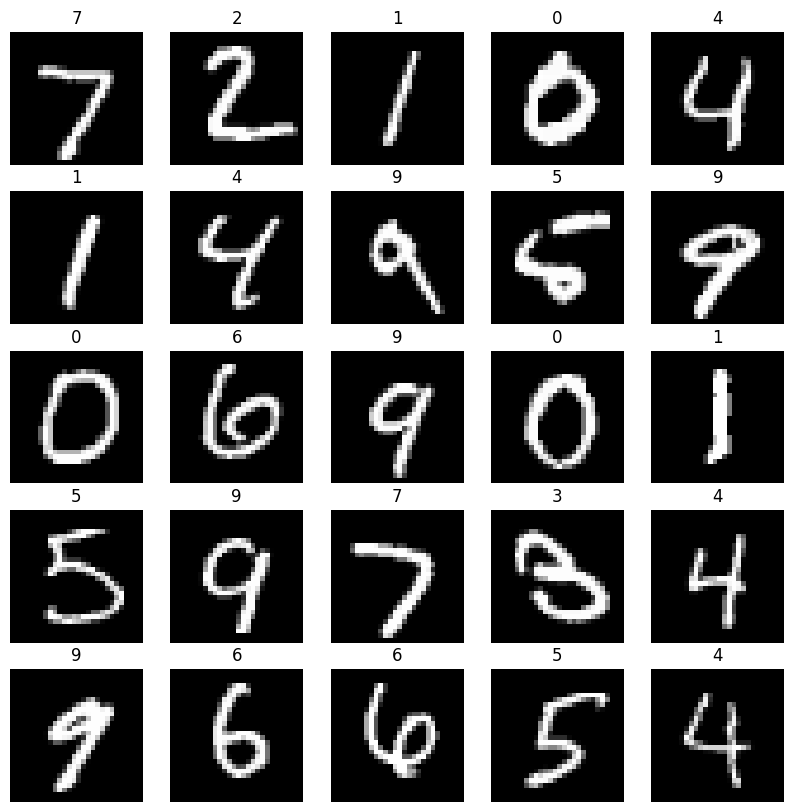

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data (flatten)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predict on test data
predictions = model.predict(X_test)

# Plot some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.show()
